In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import time
from IPython.display import display, clear_output
import glob
import os

In [3]:
Files = glob.glob("*EC.txt")
Open_Files = []
for file in range(len(Files)):
    Temp_file = open(Files[file],'r')
    for i in Temp_file:
        Open_Files.append(i.strip("())\n"))
    Temp_file.close()
for line in range(len(Open_Files)):
    Open_Files[line] = Open_Files[line].split(',')
Open_Files = np.array([np.array(i).astype(float) for i in Open_Files])

Emissions = []
for i in Files:
    Emissions.append(int(i[-10:-6].strip("_")))
print(Emissions)

[100, 250, 500, 750, 1000]


In [24]:
Iterator = int(len(Open_Files)/len(Files))
print(Iterator)
All_Emissions = np.zeros([len(Files),Iterator,2])
for i in range(len(Files)):
    All_Emissions[i] = Open_Files[Iterator*i:Iterator*(i+1)]

113


array([[[ 0.484,  0.   ],
        [ 0.483,  0.   ],
        [ 0.482,  0.   ],
        ...,
        [ 0.482, -0.   ],
        [ 0.483,  0.   ],
        [ 0.484,  0.   ]],

       [[ 0.484,  0.   ],
        [ 0.483,  0.   ],
        [ 0.482,  0.   ],
        ...,
        [ 0.482,  0.   ],
        [ 0.483,  0.   ],
        [ 0.484,  0.   ]],

       [[ 0.484,  0.   ],
        [ 0.483,  0.   ],
        [ 0.482,  0.   ],
        ...,
        [ 0.482,  0.   ],
        [ 0.483,  0.   ],
        [ 0.484,  0.   ]],

       [[ 0.484,  0.   ],
        [ 0.483,  0.   ],
        [ 0.482,  0.   ],
        ...,
        [ 0.482,  0.   ],
        [ 0.483,  0.   ],
        [ 0.484,  0.   ]],

       [[ 0.484,  0.   ],
        [ 0.483,  0.   ],
        [ 0.482,  0.   ],
        ...,
        [ 0.482,  0.   ],
        [ 0.483,  0.   ],
        [ 0.484,  0.   ]]])

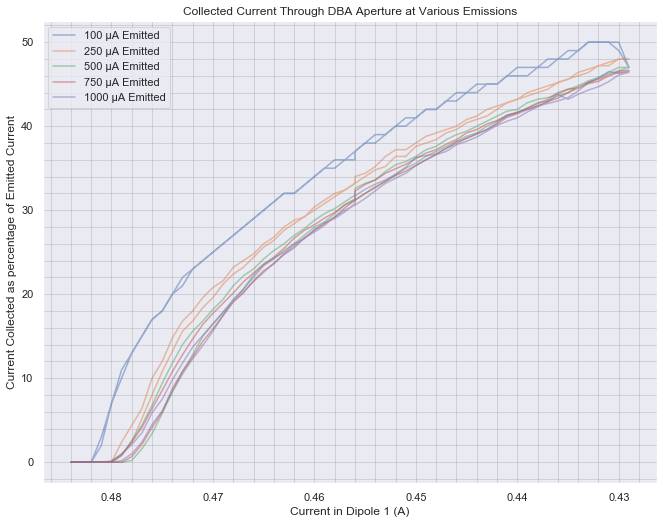

In [25]:
plt.figure(figsize = (11,8.5))
view_list = range(len(All_Emissions))
#view_list = [0,1,20]
for run in view_list:
    #plt.scatter(All_Emissions[run,:,0],100*abs(All_Emissions[run,:,1]/max(abs(All_Emissions[run,:,1]))),label = "{} \u03BCA Emitted".format(Emissions[run]))
    plt.plot(All_Emissions[run,:,0],100*1000*abs(All_Emissions[run,:,1]/Emissions[run]),label = "{} \u03BCA Emitted".format(Emissions[run]),alpha = 0.5)
plt.minorticks_on()
plt.grid(True,alpha = 0.25,which = 'both',color = 'gray')
plt.legend()
plt.title("Collected Current Through DBA Aperture at Various Emissions")
plt.xlabel("Current in Dipole 1 (A)")
plt.ylabel("Current Collected as percentage of Emitted Current")
plt.gca().invert_xaxis()
#plt.savefig("DP1_Results.svg",transparent = True)